▪ Parte 2:
1. Para las imágenes `img1_tp.png` y `img2_tp.png` leerlas con OpenCV en escala de grisas y visualizarlas.
2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como ‘features’ a los histogramas?
3. Para la imagen `segmentacion.png` analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas.

In [223]:
# Importamos las librerias que vamos a utilizar
%matplotlib inline

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [224]:
def mostrar_img_grises(imgs):
    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.4,
                        hspace=0.4)

    fig = plt.figure(1)
    for index, img in enumerate(imgs):
        ax = fig.add_subplot(2, 2, (index % 2) + 1)
        ax.set_title(f'img{index + 1} - escala de grises')
        ax.imshow(img, cmap='gray', vmin=0, vmax=255)
        ax.axis('off')
        ax.set_ylabel('pixeles')

    plt.show()


def mostrar_histogramas(imgs, bins):
    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.4,
                        hspace=0.4)

    fig = plt.figure(1)
    for index, img in enumerate(imgs):
        ax = fig.add_subplot(2, 2, (index % 2) + 1)
        ax.set_title(f'img{index + 1} - {bins} bins')
        hist, _ = np.histogram(img, bins)
        ax.plot(hist)
        ax.set_xlabel('bins')
        ax.set_ylabel('pixeles')

    plt.show()

In [225]:
img1_grises = cv.imread('material/img1_tp.png', cv.IMREAD_GRAYSCALE)
img2_grises = cv.imread('material/img2_tp.png', cv.IMREAD_GRAYSCALE)

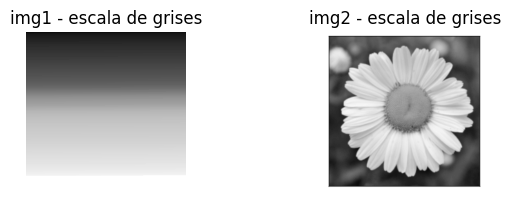

In [226]:
mostrar_img_grises([img1_grises, img2_grises])

Tengo dudas respecto a este ejercicio, ya que las imagenes se muestran de manera "opuesta" a lo que uno ve al abrir los archivos.

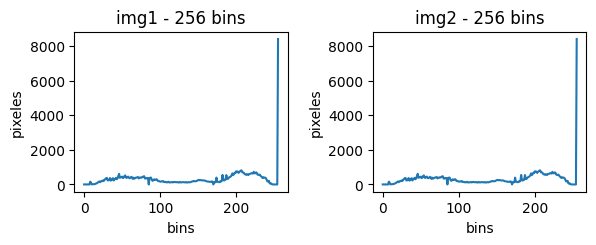

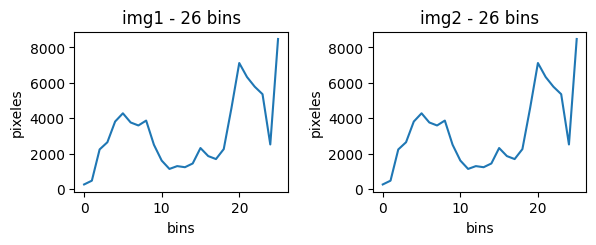

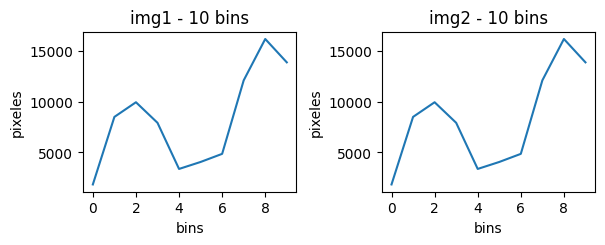

In [227]:
mostrar_histogramas([img1_grises, img2_grises], 256)
mostrar_histogramas([img1_grises, img2_grises], 26)
mostrar_histogramas([img1_grises, img2_grises], 10)

En el eje x tenemos los bins, que representan la cantidad de "cajitas" en las que agrupamos los valores de los pixeles. Cuando decimos bins 256, significa que para cada valor posible de los pixeles (0 a 255), habra un valor en el eje x. Al usar un valor menor a 256, se terminan agrupando los pixeles.
En el eje y tenemos la cantidad de pixeles en la foto que tienen el valor (o los valores) correspondiente al bin en la imagen.

No seria posible usar los histogramas como features, ya que, solo muestran la cantidad de pixeles con cierto valor, no como se distribuyen los mismos en la foto para generar los objetos de la misma. Como puede observarse, las imagenes 1 y 2 terminaron generando histogramas practicamente identicos, pero al ver las fotos, se observa que uno es un degrade, y el otro una imagen de una flor. Ambos tienen cantidades similares de pixeles con el mismo valor, pero la imagen que es generada por cada uno, es muy distinta.

3. Para la imagen `segmentacion.png` analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas.


In [248]:
img_segmentacion_bgr = cv.imread('material/segmentacion.png')

In [249]:
def mostrar_img_bgr(img):
    plt.imshow(img[..., ::-1])
    plt.axis("off")
    plt.show()

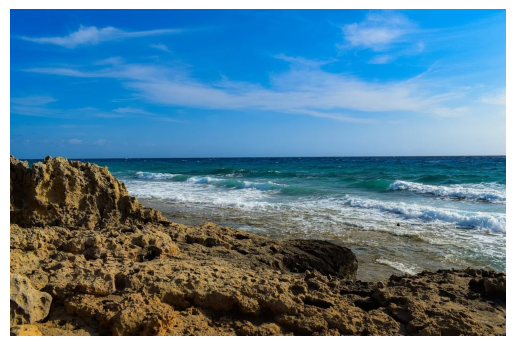

In [250]:
mostrar_img_bgr(img_segmentacion_bgr)

In [231]:
COLOR = ('b', 'g', 'r')

def histograma_bgr(img):
    for i, c in enumerate(COLOR):
        hist = cv.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(hist, color=c)
        plt.xlim([0, 256])

    plt.show()

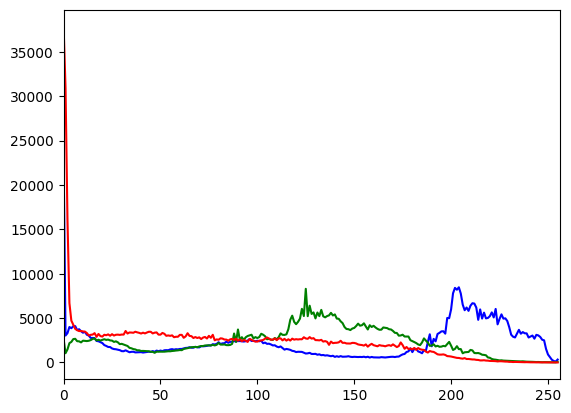

In [232]:
histograma_bgr(img_segmentacion_bgr)

In [233]:
# Pasamos la imagen a HSV
img_segmentacion_hsv = cv.cvtColor(img_segmentacion_bgr, cv.COLOR_BGR2HSV)

Segmentamos el cielo

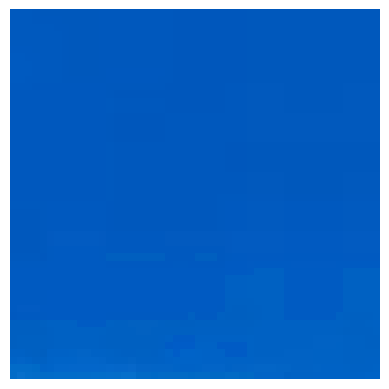

(105.7924, 254.448, 191.0864, 0.0)


In [251]:
# Calculamos el valor medio de la muestra
cielo_muestra_hsv = img_segmentacion_hsv[0:50, 0:50, :]
mostrar_img_bgr(cv.cvtColor(cielo_muestra_hsv, cv.COLOR_HSV2BGR))
cielo_mean = cv.mean(cielo_muestra_hsv)

print(cielo_mean)

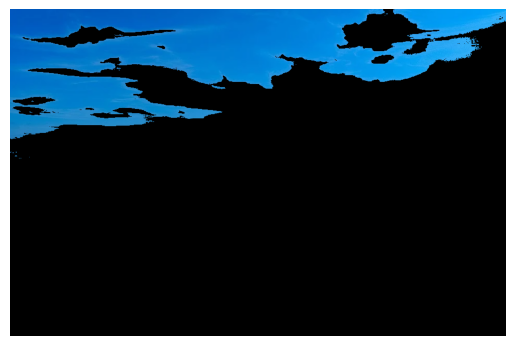

In [235]:
cielo_l = (100,200,150)
cielo_u = (115,255,255)

mascara_cielo = cv.inRange(img_segmentacion_hsv, cielo_l,  cielo_u)
cielo_segmentado = cv.bitwise_and(img_segmentacion_bgr, img_segmentacion_bgr, mask=mascara_cielo)

mostrar_img_bgr(cielo_segmentado)

Segmentamos la tierra

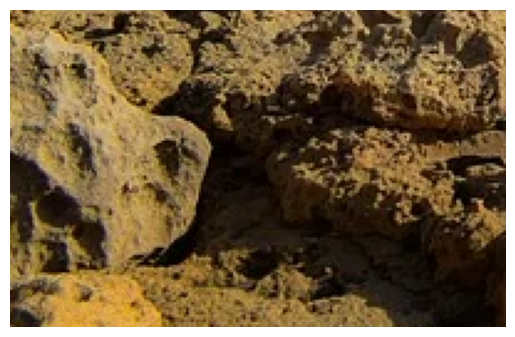

(17.699609375, 158.67484375, 99.472734375, 0.0)


In [253]:
tierra_muestra_hsv = img_segmentacion_hsv[500:, 0:200, :]
mostrar_img_bgr(cv.cvtColor(tierra_muestra_hsv, cv.COLOR_HSV2BGR))

tierra_mean = cv.mean(tierra_muestra_hsv)

print(tierra_mean)

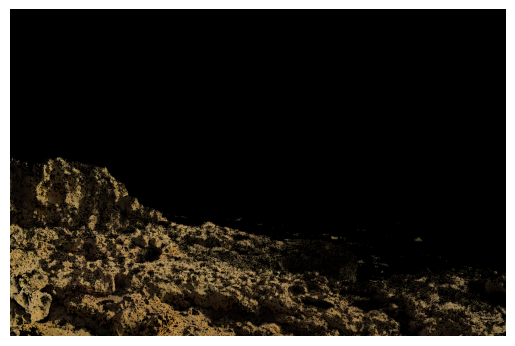

In [254]:
tierra_l = (0,100,0)
tierra_u = (30,220,200)

mascara_tierra = cv.inRange(img_segmentacion_hsv, tierra_l,  tierra_u)
tierra_segmentada = cv.bitwise_and(img_segmentacion_bgr, img_segmentacion_bgr, mask=mascara_tierra)

mostrar_img_bgr(tierra_segmentada)

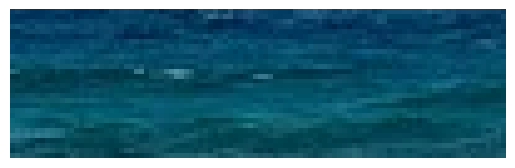

(97.544, 235.96699999999998, 99.23933333333333, 0.0)


In [256]:
agua_muestra_hsv = img_segmentacion_hsv[290: 320, 600: 700,:]
mostrar_img_bgr(cv.cvtColor(agua_muestra_hsv, cv.COLOR_HSV2BGR))

agua_mean = cv.mean(agua_muestra_hsv)

print(agua_mean)

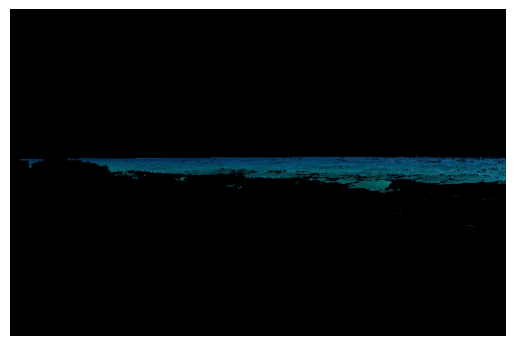

In [257]:
agua_l = (80,190,0)
agua_u = (120,255,150)

mascara_agua = cv.inRange(img_segmentacion_hsv, agua_l,  agua_u)
agua_segmentada = cv.bitwise_and(img_segmentacion_bgr, img_segmentacion_bgr, mask=mascara_agua)

mostrar_img_bgr(agua_segmentada)